### Table of Contents

Use this table to navigate to the respective Section

- [0 Loading the Data](#0-loading-the-data)
- [Q1](#q1)
    - [Q1.1 CEO statement](#Q1.1-ceo-statement)
    - [Q1.2 Exploratory Data Analysis](#Q1.2-exploratory-data-analysis)
        - [Q1.2.1 Data Description and cleaning](#Q1.2.1-data-description-and-cleaning)
        - [Q1.2.2 Descriptive Statistics](#Q1.2.2-descriptive-statistics)
        - [Q1.2.3 Correlation Matrix](#q123-correlation-matrix)
- [Q2](#q2)
    - [Q2.1 Problem type](#q21-problem-type)
    - [Q2.2 Model training](#q22-models)
        - [Q2.2.1 Random Forest](#q221-random-forest)
        - [Q2.2.2 XGBoost](#q222-xgboosting)
- [Q3](#q3)
    - [Q3.1 Metric](#q31-evaluation-metric)
    - [Q3.2 Model evaluation](#q32-evaluation-metric)
- [Q4](#q4)
- [Q5](#q5)
    - [Q5.1 Feature Importance interpretation](#q51-feature-importance)
    - [Q5.2 Actionable steps](#q52-actionable-steps)

# 0. Loading the Data

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("2767ML_assignment1_data.csv")
display(df.head())


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False


# Q1

The CEO claims that 15% of customers churn are coming from international plan . Using the 
provided dataset validate the CEO’s statement and extract additional insights.

# Q1.1 CEO statement

Is the CEO statement correct? [Yes,No]  
  If not, what is the churn percentage? [Numeric]

In [176]:
churned_customers = df[df["Churn"] == True]

# Now print the table
display(churned_customers.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
5,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
6,OK,101,408,No,No,0,89.7,118,15.25,260.1,79,22.11,170.1,93,7.65,13.5,11,3.65,5,True
12,CO,92,415,No,No,0,184.7,60,31.40,262.0,73,22.27,239.5,120,10.78,12.3,6,3.32,2,True
13,WA,55,408,No,No,0,285.7,124,48.57,230.9,106,19.63,230.7,140,10.38,14.8,7,4.00,0,True


In [177]:
churned_customers_int = churned_customers[churned_customers["International plan"] == "Yes"] #filtering churned customers with international plan
churn_rate_int = round(len(churned_customers_int)/len(churned_customers)*100,2)

if 14 < churn_rate_int <16:
    print("CEO statement correct")
else:
    print(f"CEO statement is wrong, the customers churn coming from international plan is {churn_rate_int}%")

CEO statement is wrong, the customers churn coming from international plan is 27.59%


# Q1.2 Exploratory Data Analysis

## Q1.2.1 Data Description and Cleaning

In [178]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2999 non-null   object 
 1   Account length          2999 non-null   int64  
 2   Area code               2999 non-null   int64  
 3   International plan      2999 non-null   object 
 4   Voice mail plan         2999 non-null   object 
 5   Number vmail messages   2999 non-null   int64  
 6   Total day minutes       2999 non-null   float64
 7   Total day calls         2999 non-null   int64  
 8   Total day charge        2999 non-null   float64
 9   Total eve minutes       2999 non-null   float64
 10  Total eve calls         2999 non-null   int64  
 11  Total eve charge        2999 non-null   float64
 12  Total night minutes     2999 non-null   float64
 13  Total night calls       2999 non-null   int64  
 14  Total night charge      2999 non-null   

In [179]:
print(df.describe())

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2999.000000  2999.000000            2999.000000        2999.000000   
mean       101.348449   436.735245               8.194065         179.796132   
std         39.741765    42.112741              13.731450          54.313911   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.300000   
75%        127.000000   415.000000              20.000000         216.850000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2999.000000       2999.000000        2999.000000      2999.000000   
mean        100.572858         30.565895         201.225375       100.136379   
std          20.100779          9.23333

In [180]:
#Identify missing values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [181]:
#Identify nan values
print("Checking for missing values:")
print(df.isna().sum())

Checking for missing values:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [ ]:
#Identify duplicates
print("Checking for duplicates:")
print(df.duplicated().sum())

Checking for missing values:
0


In [183]:
#drop unneccessary column
df.drop(columns=["Area code"], inplace=True)

## Q1.2.2 Descriptive statistics

**Categorical features**

In [184]:
categorical_features = df[["State","International plan", "Voice mail plan", "Churn"]]

for variable in categorical_features:
    print(f"{variable}: {df[variable].unique()}")


State: ['NE' 'TX' 'VT' 'GA' 'IL' 'IN' 'OK' 'TN' 'NV' 'VA' 'KS' 'CO' 'WA' 'MT'
 'ND' 'SD' 'AL' 'UT' 'MN' 'WI' 'OH' 'WY' 'MD' 'RI' 'PA' 'CT' 'DC' 'DE'
 'MA' 'OR' 'NJ' 'SC' 'MO' 'HI' 'IA' 'LA' 'AK' 'ME' 'NM' 'KY' 'NY' 'MI'
 'WV' 'FL' 'NC' 'NH' 'AR' 'AZ' 'ID' 'CA' 'MS']
International plan: ['No' 'Yes']
Voice mail plan: ['No' 'Yes']
Churn: [False  True]


**Numerical features**

In [185]:
numerical_features = [col for col in df.columns if col not in categorical_features]

print("Range:")
for variable in numerical_features:
    print(f"{variable}: {df[variable].min()} - {df[variable].max()}")

Range:
Account length: 1 - 243
Number vmail messages: 0 - 51
Total day minutes: 0.0 - 350.8
Total day calls: 0 - 165
Total day charge: 0.0 - 59.64
Total eve minutes: 0.0 - 363.7
Total eve calls: 0 - 170
Total eve charge: 0.0 - 30.91
Total night minutes: 23.2 - 395.0
Total night calls: 33 - 175
Total night charge: 1.04 - 17.77
Total intl minutes: 0.0 - 18.9
Total intl calls: 0 - 20
Total intl charge: 0.0 - 5.1
Customer service calls: 0 - 9


**Frequency Plots**

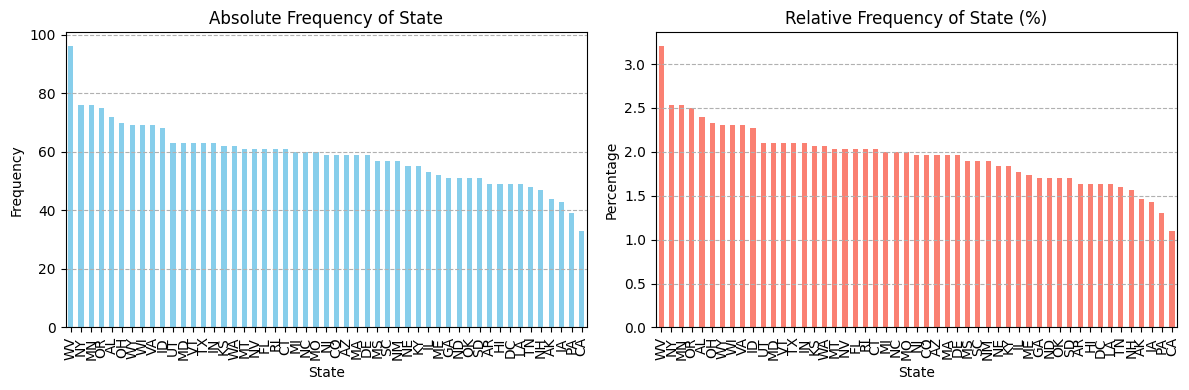

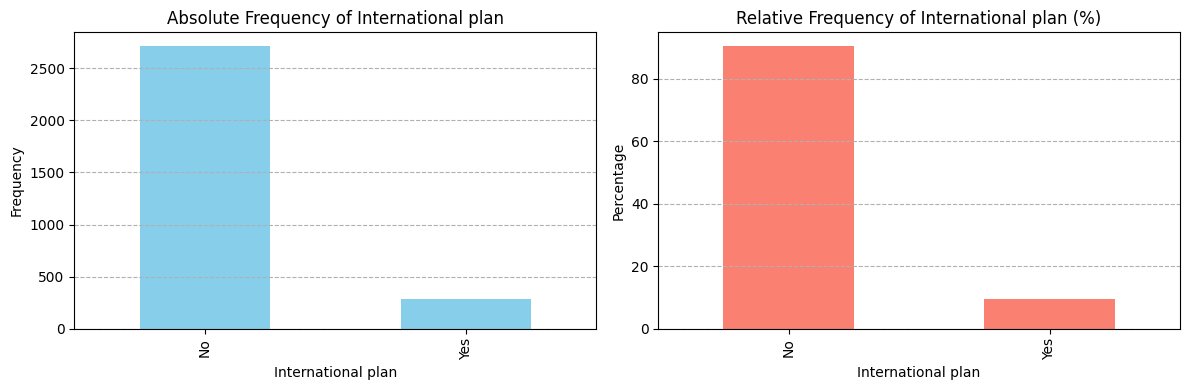

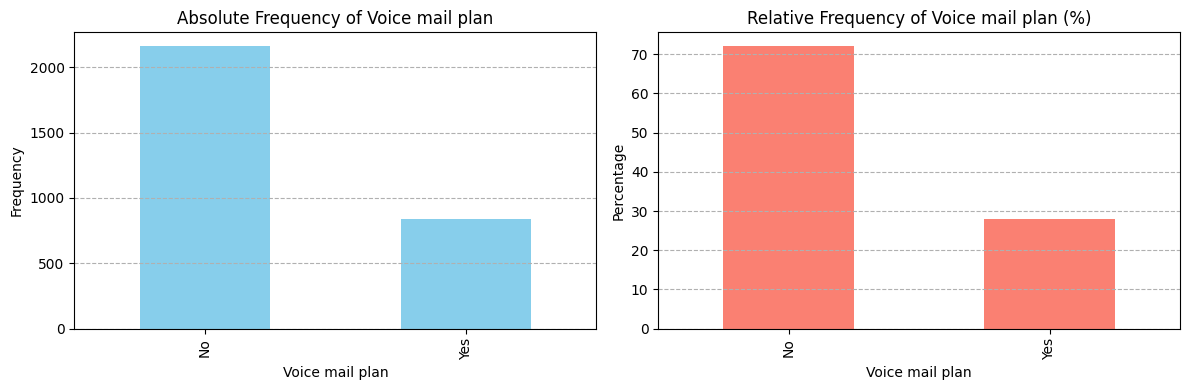

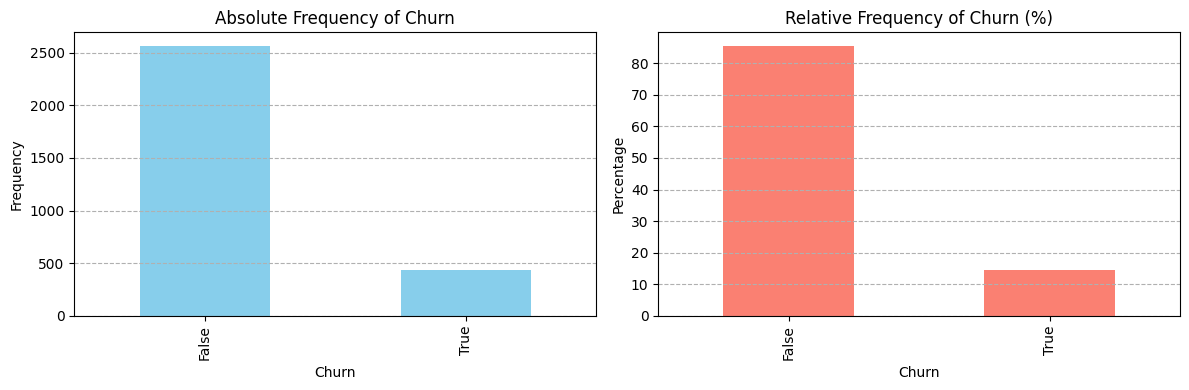

In [186]:
def plot_frequency(variable):
# Calculate absolute frequency
    abs_freq = df[variable].value_counts()
    
    # Calculate relative frequency
    rel_freq = df[variable].value_counts(normalize=True) * 100
    
    # Plotting
    plt.figure(figsize=(12, 4))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='salmon')
    plt.title(f'Relative Frequency of {variable} (%)')
    plt.xlabel(variable)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()

for variable in categorical_features:
    plot_frequency(variable)


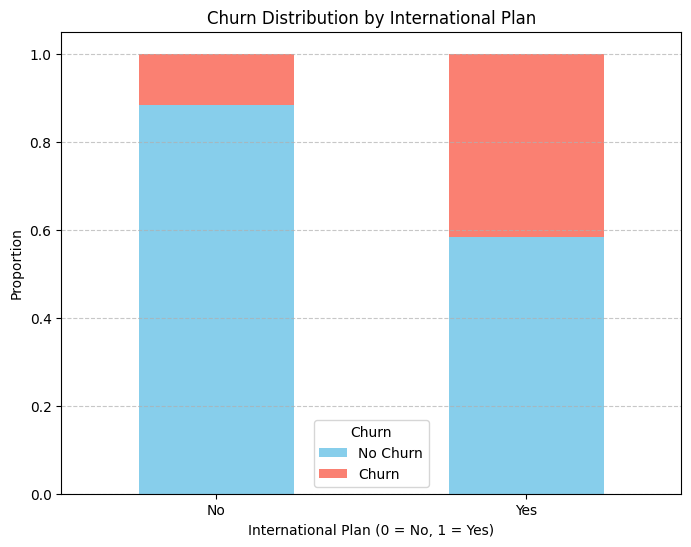

Churn distribution by International Plan:
Churn                  False     True 
International plan                    
No                  0.883807  0.116193
Yes                 0.583333  0.416667

Overall churn rate: 14.50%


In [187]:
churn_distribution = df.groupby('International plan')['Churn'].value_counts(normalize=True).unstack()

# Calculate overall churn rate
overall_churn_rate = df['Churn'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
churn_distribution.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
plt.title('Churn Distribution by International Plan')
plt.xlabel('International Plan (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Print churn distribution and overall churn rate
print("Churn distribution by International Plan:")
print(churn_distribution)
print(f"\nOverall churn rate: {overall_churn_rate:.2%}")

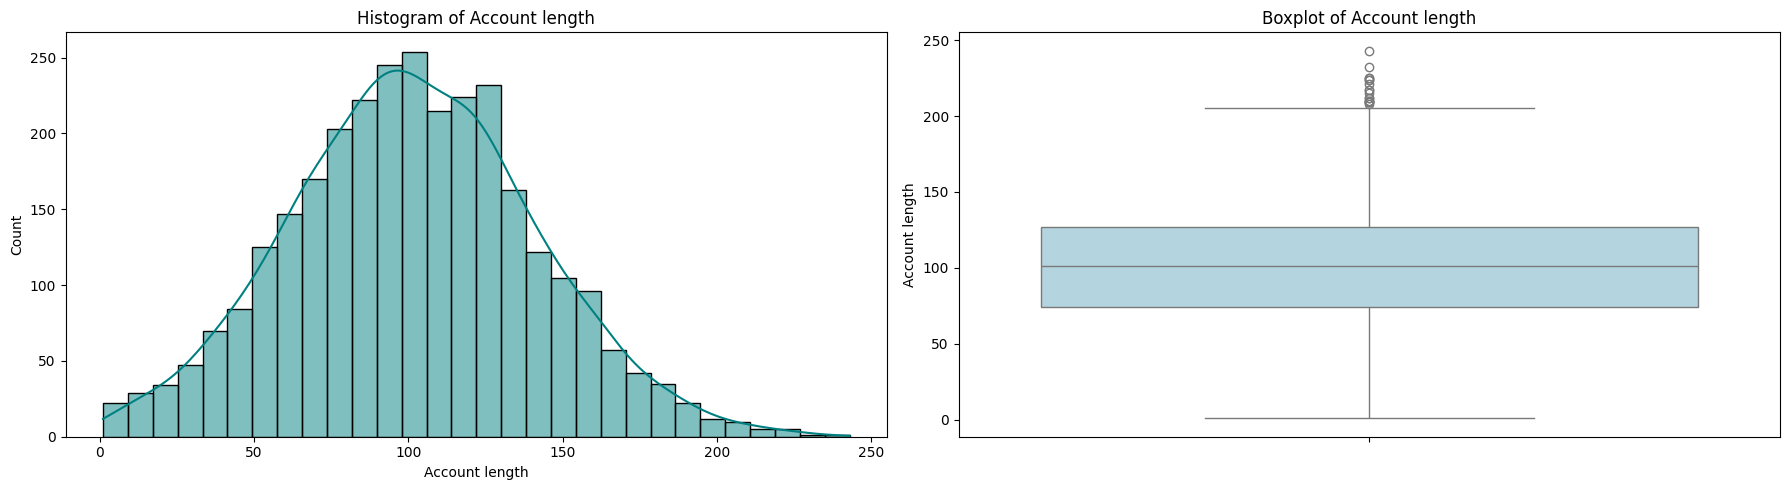

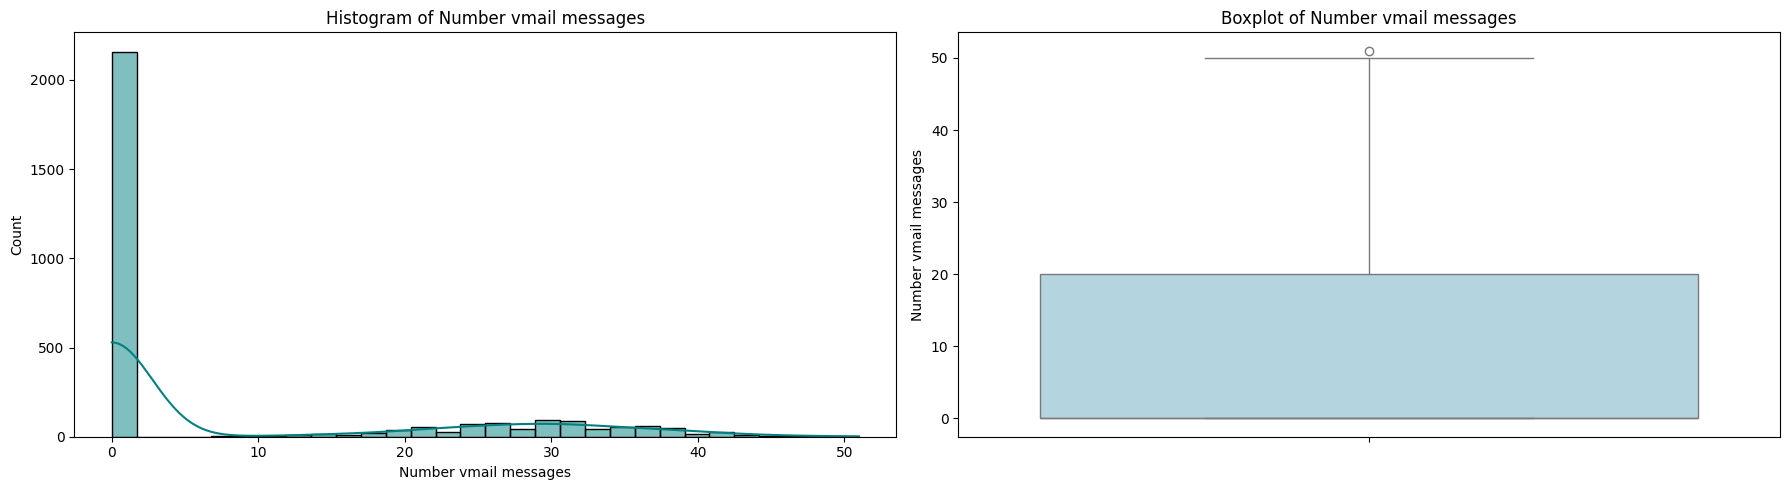

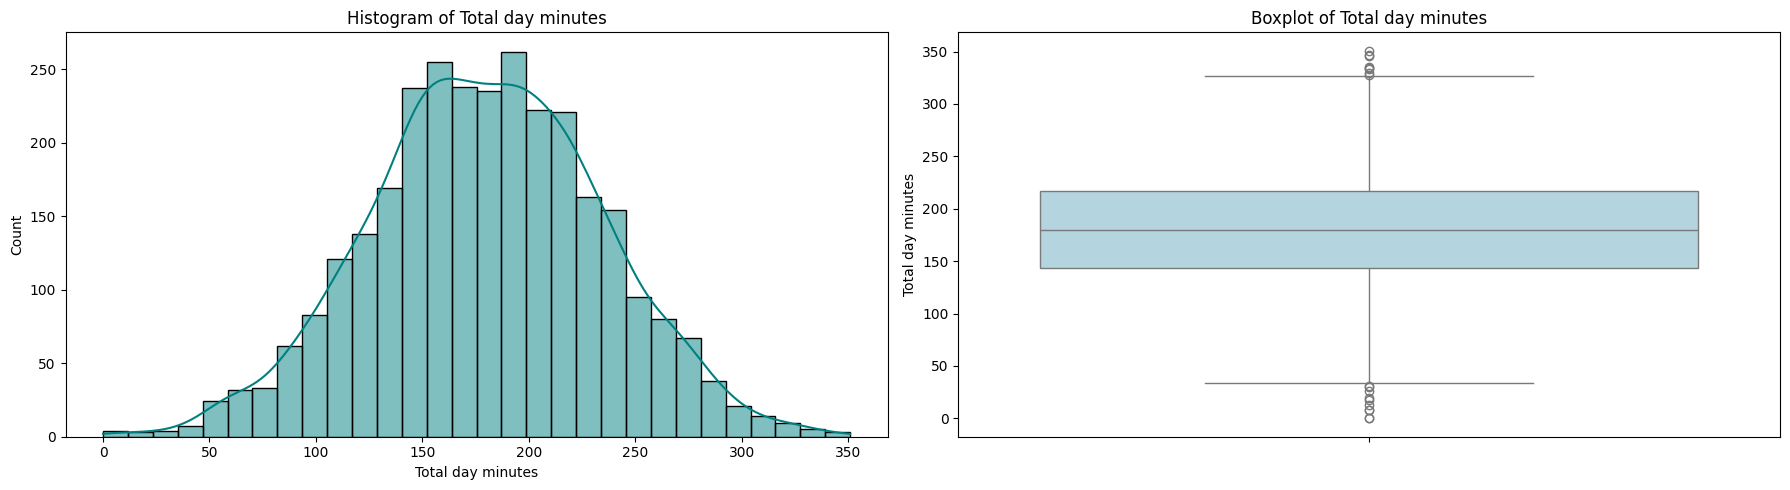

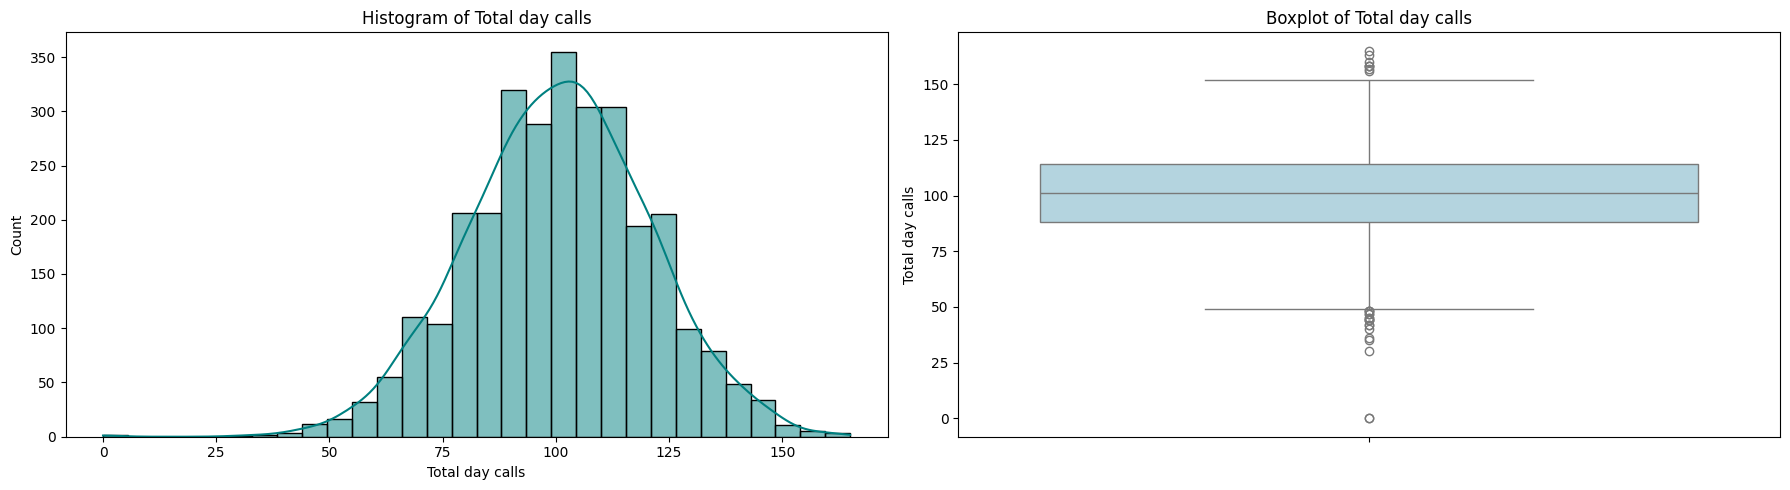

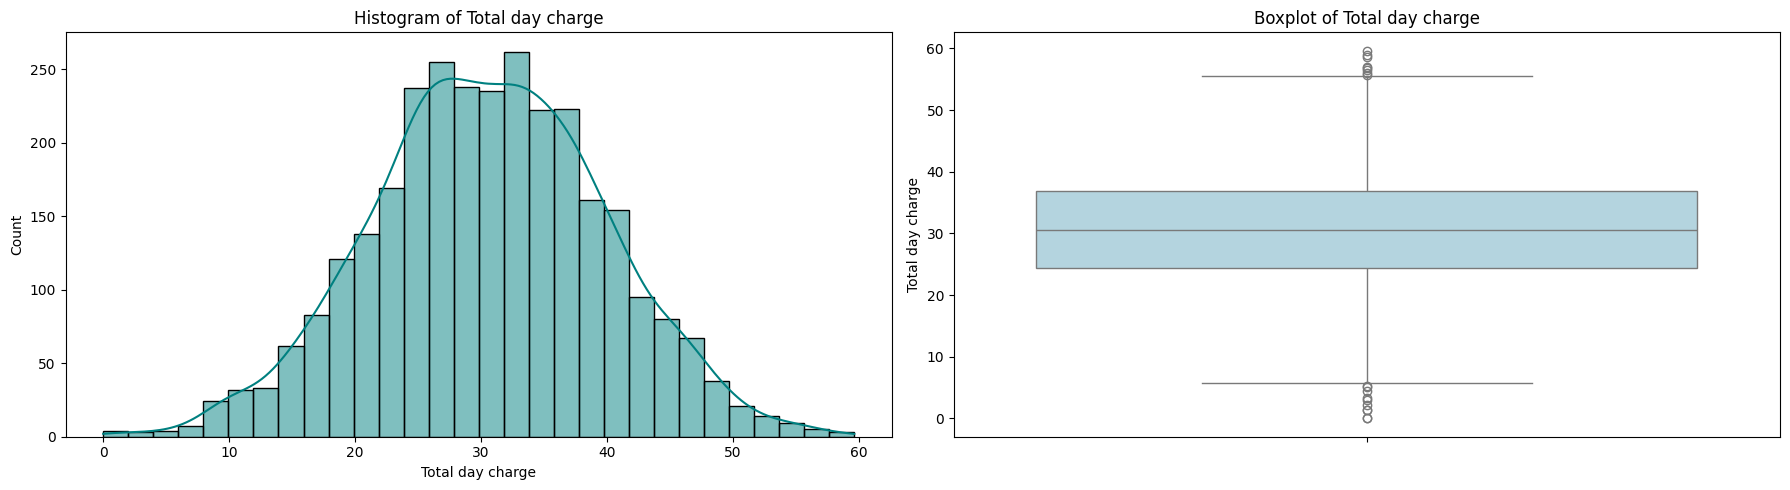

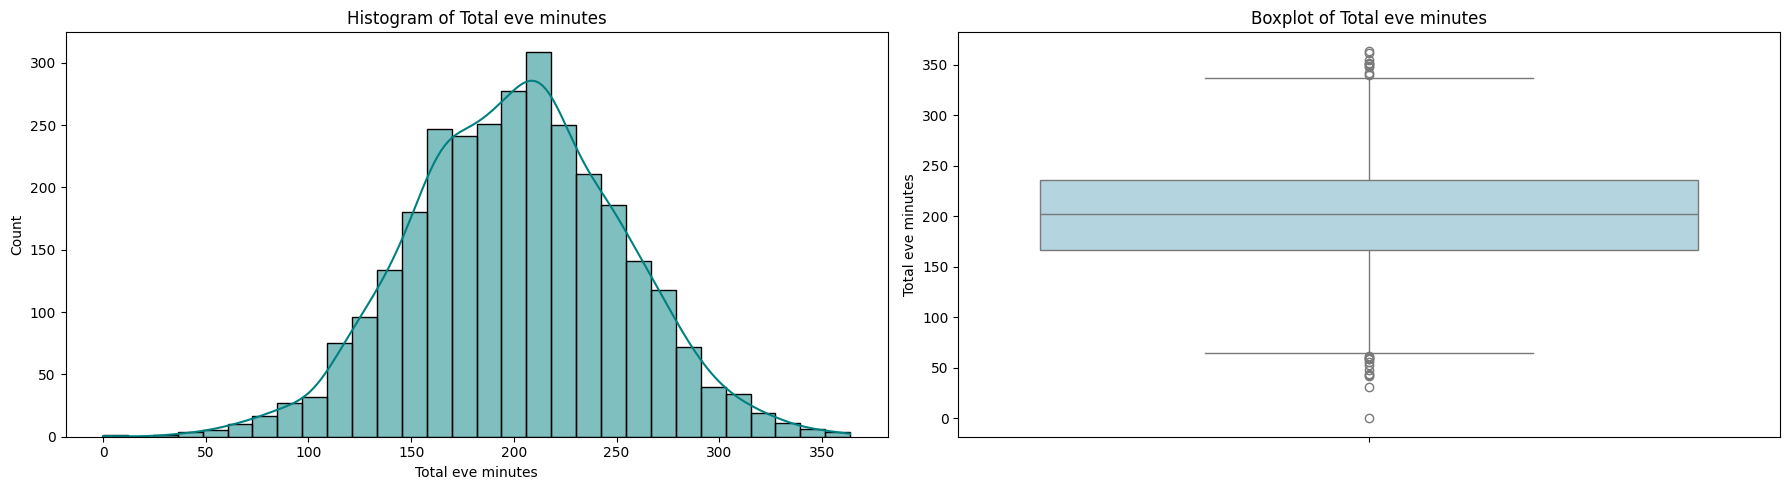

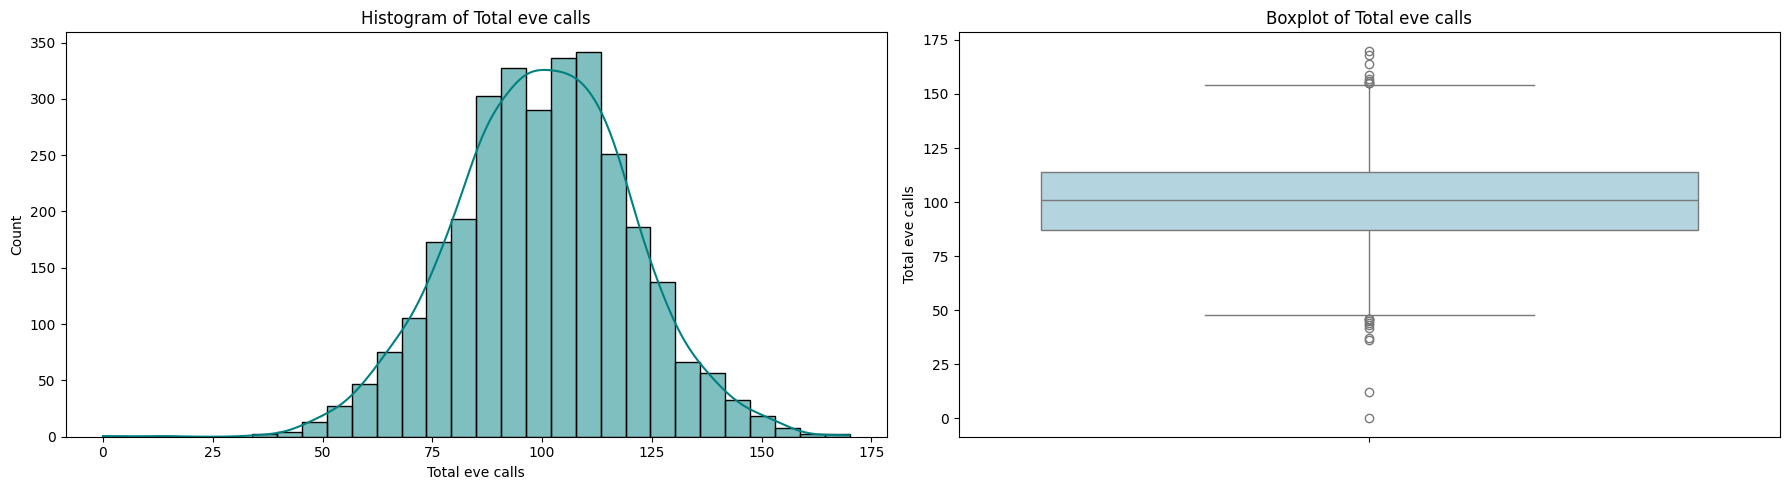

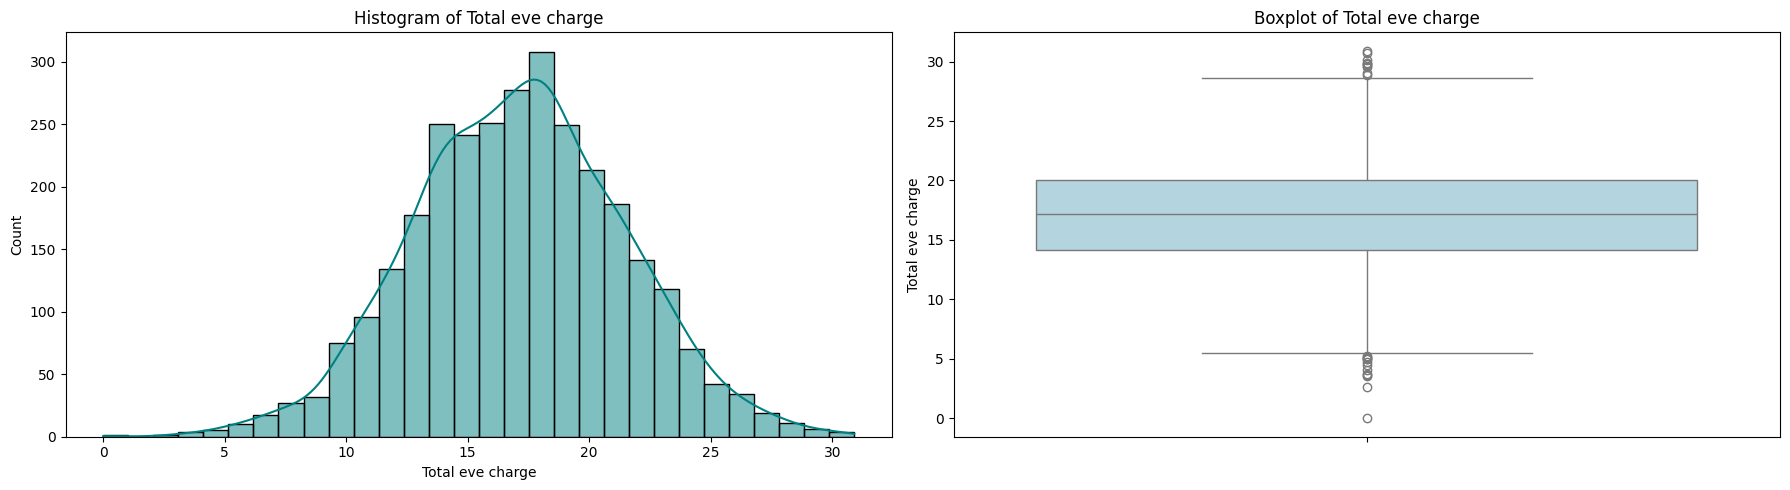

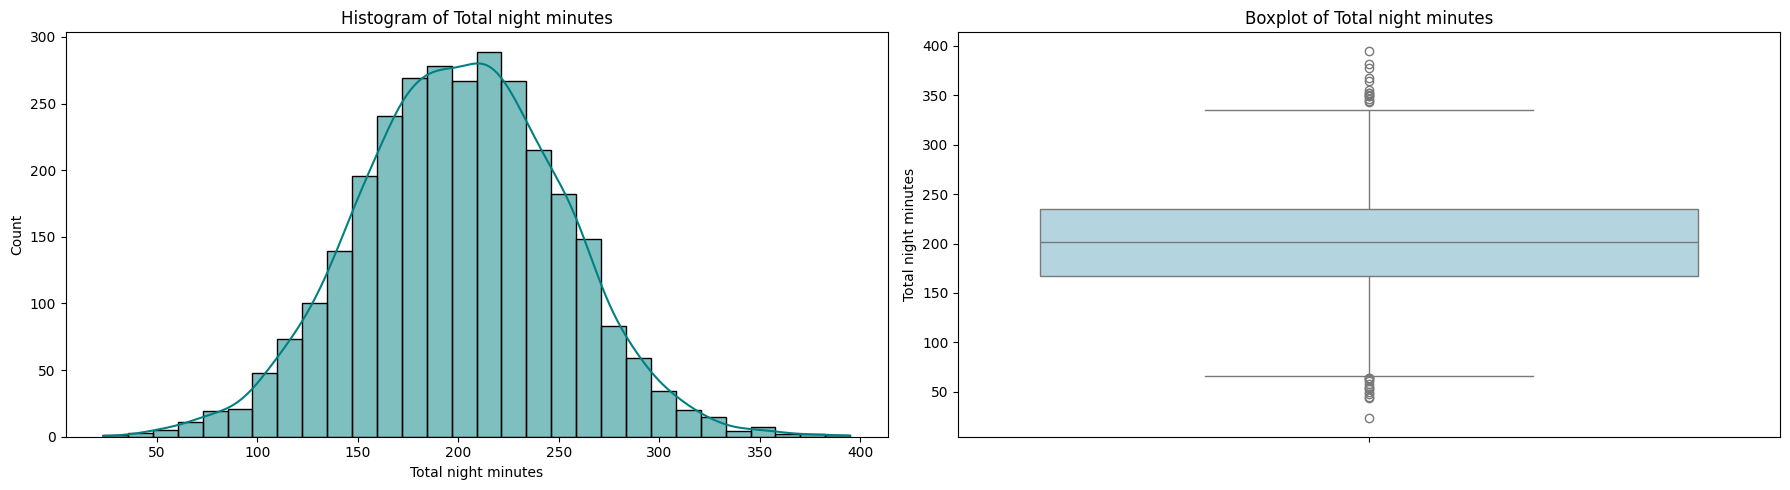

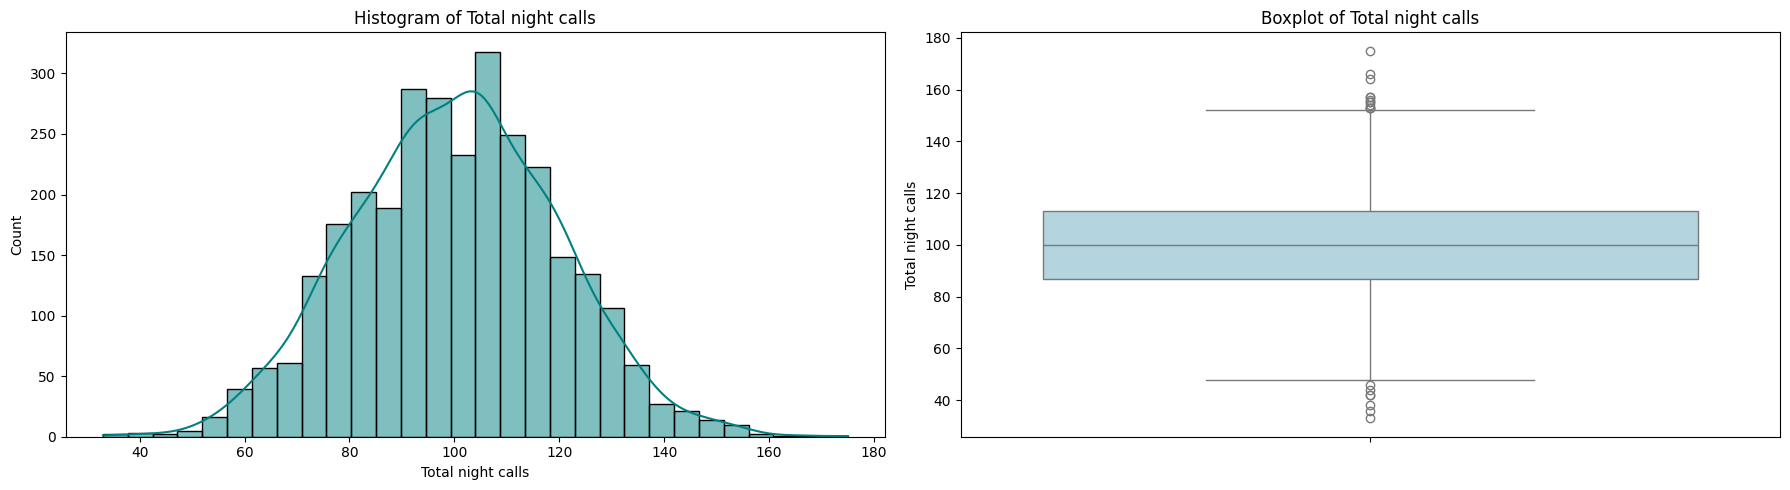

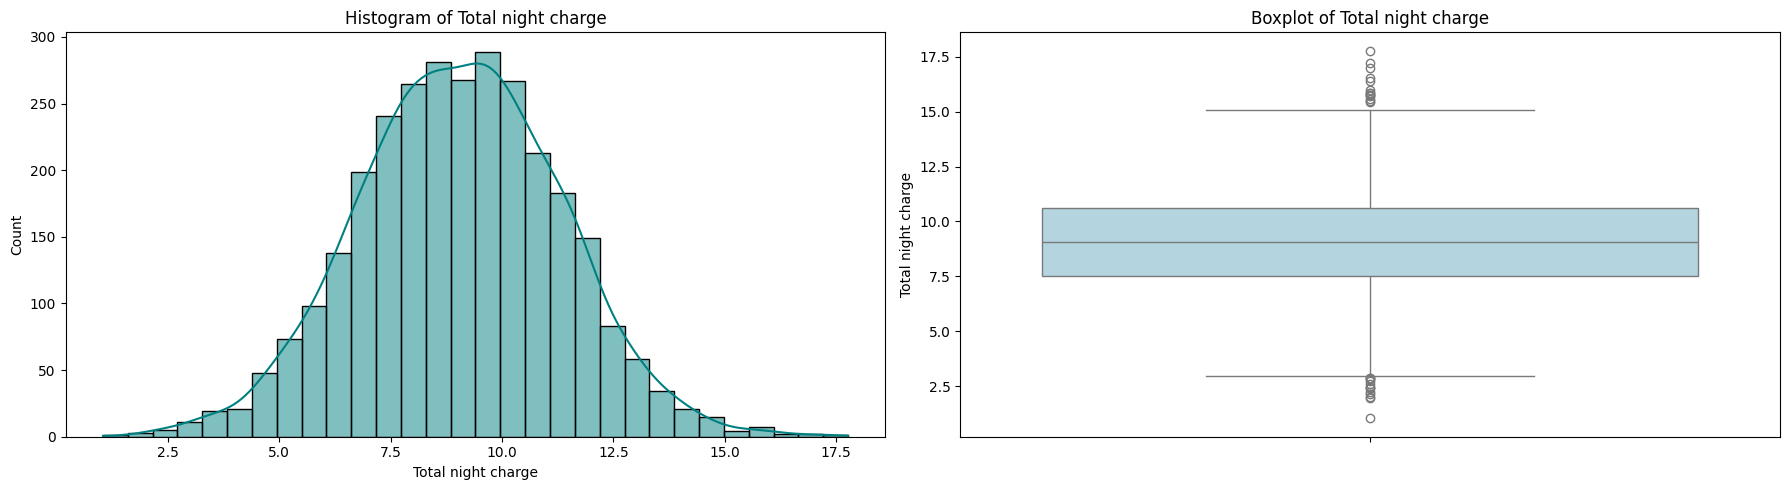

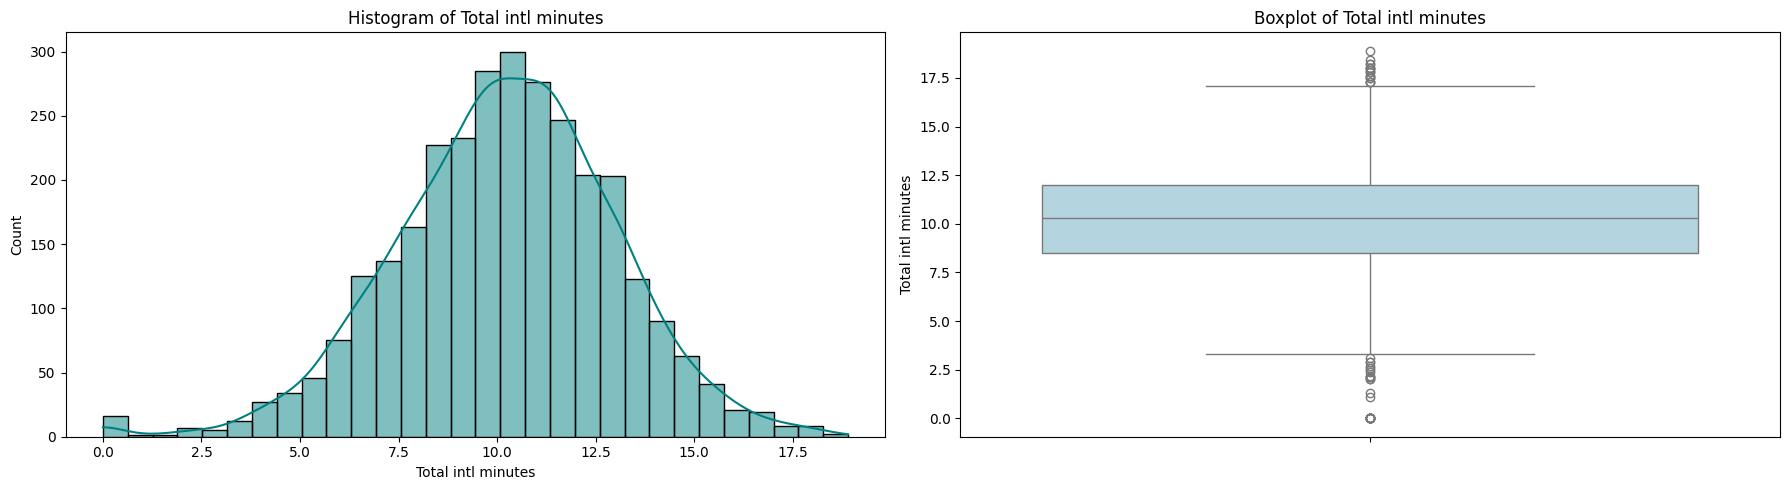

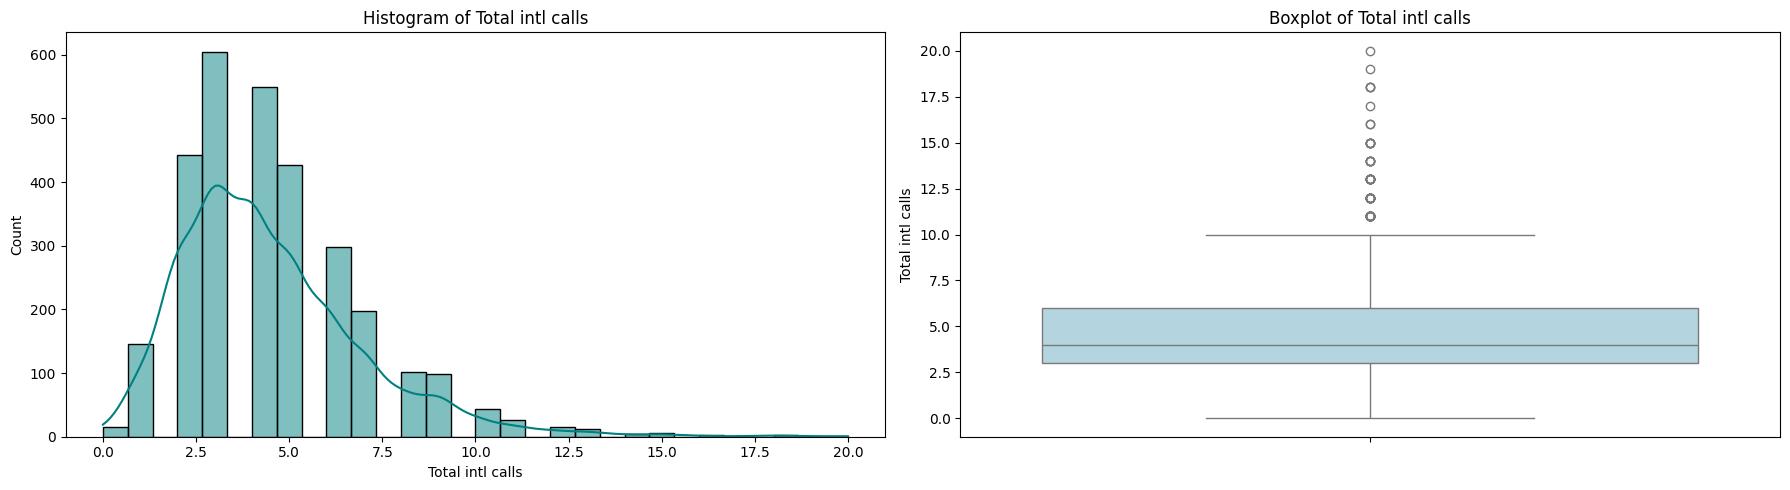

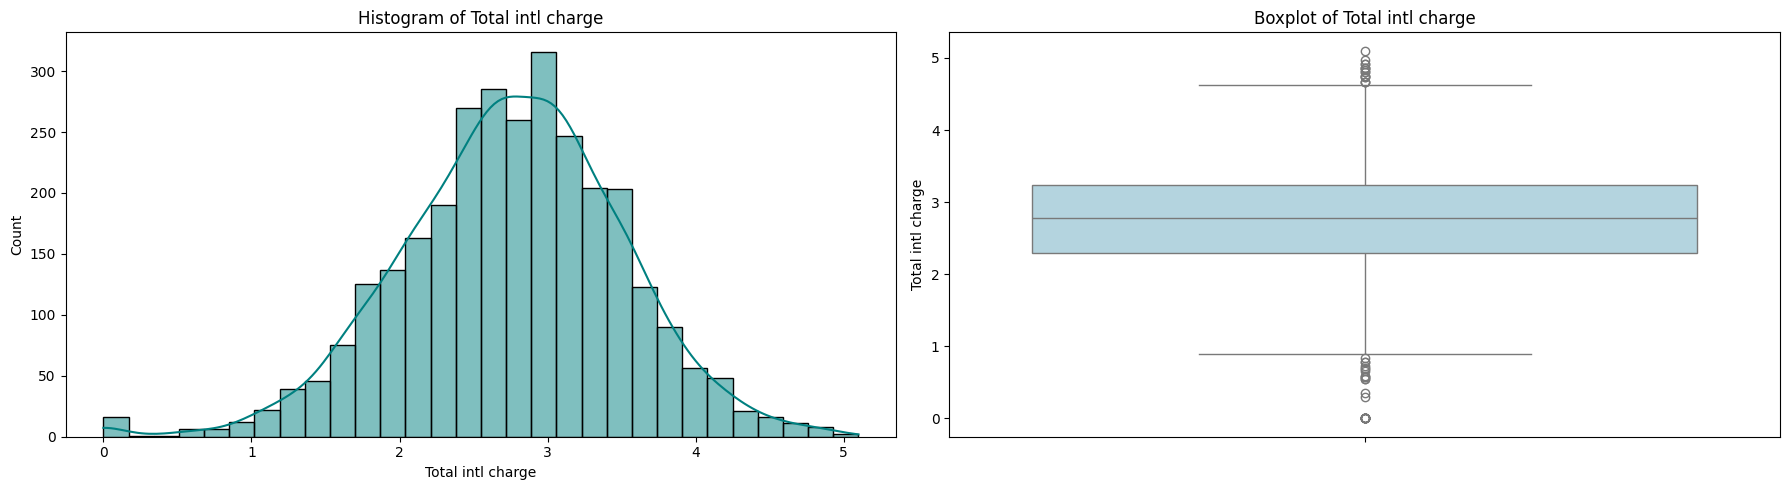

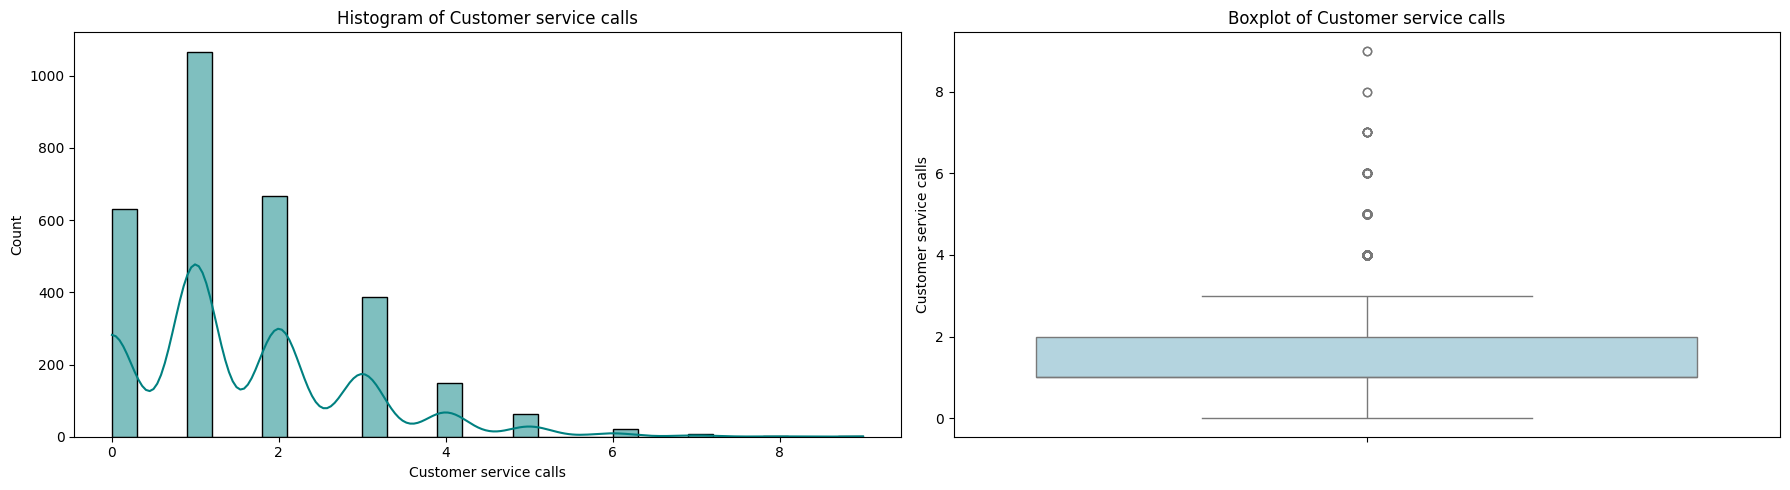

In [188]:
def kernel_hist_box_plot(variable):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))  #2 subplots
    # Histogram (left)
    sns.histplot(df[variable], bins=30, kde=True, color='teal', ax=axes[0])
    axes[0].set_title(f"Histogram of {variable}")
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Count')

    # Boxplot (right)
    sns.boxplot(y=df[variable], color='lightblue', ax=axes[1])
    axes[1].set_title(f"Boxplot of {variable}")
    axes[1].set_ylabel(variable)

    plt.tight_layout()
    plt.show()

# Iterations
for variable in numerical_features:
    kernel_hist_box_plot(variable)

## Q1.2.3 Correlation Matrix

<Axes: >

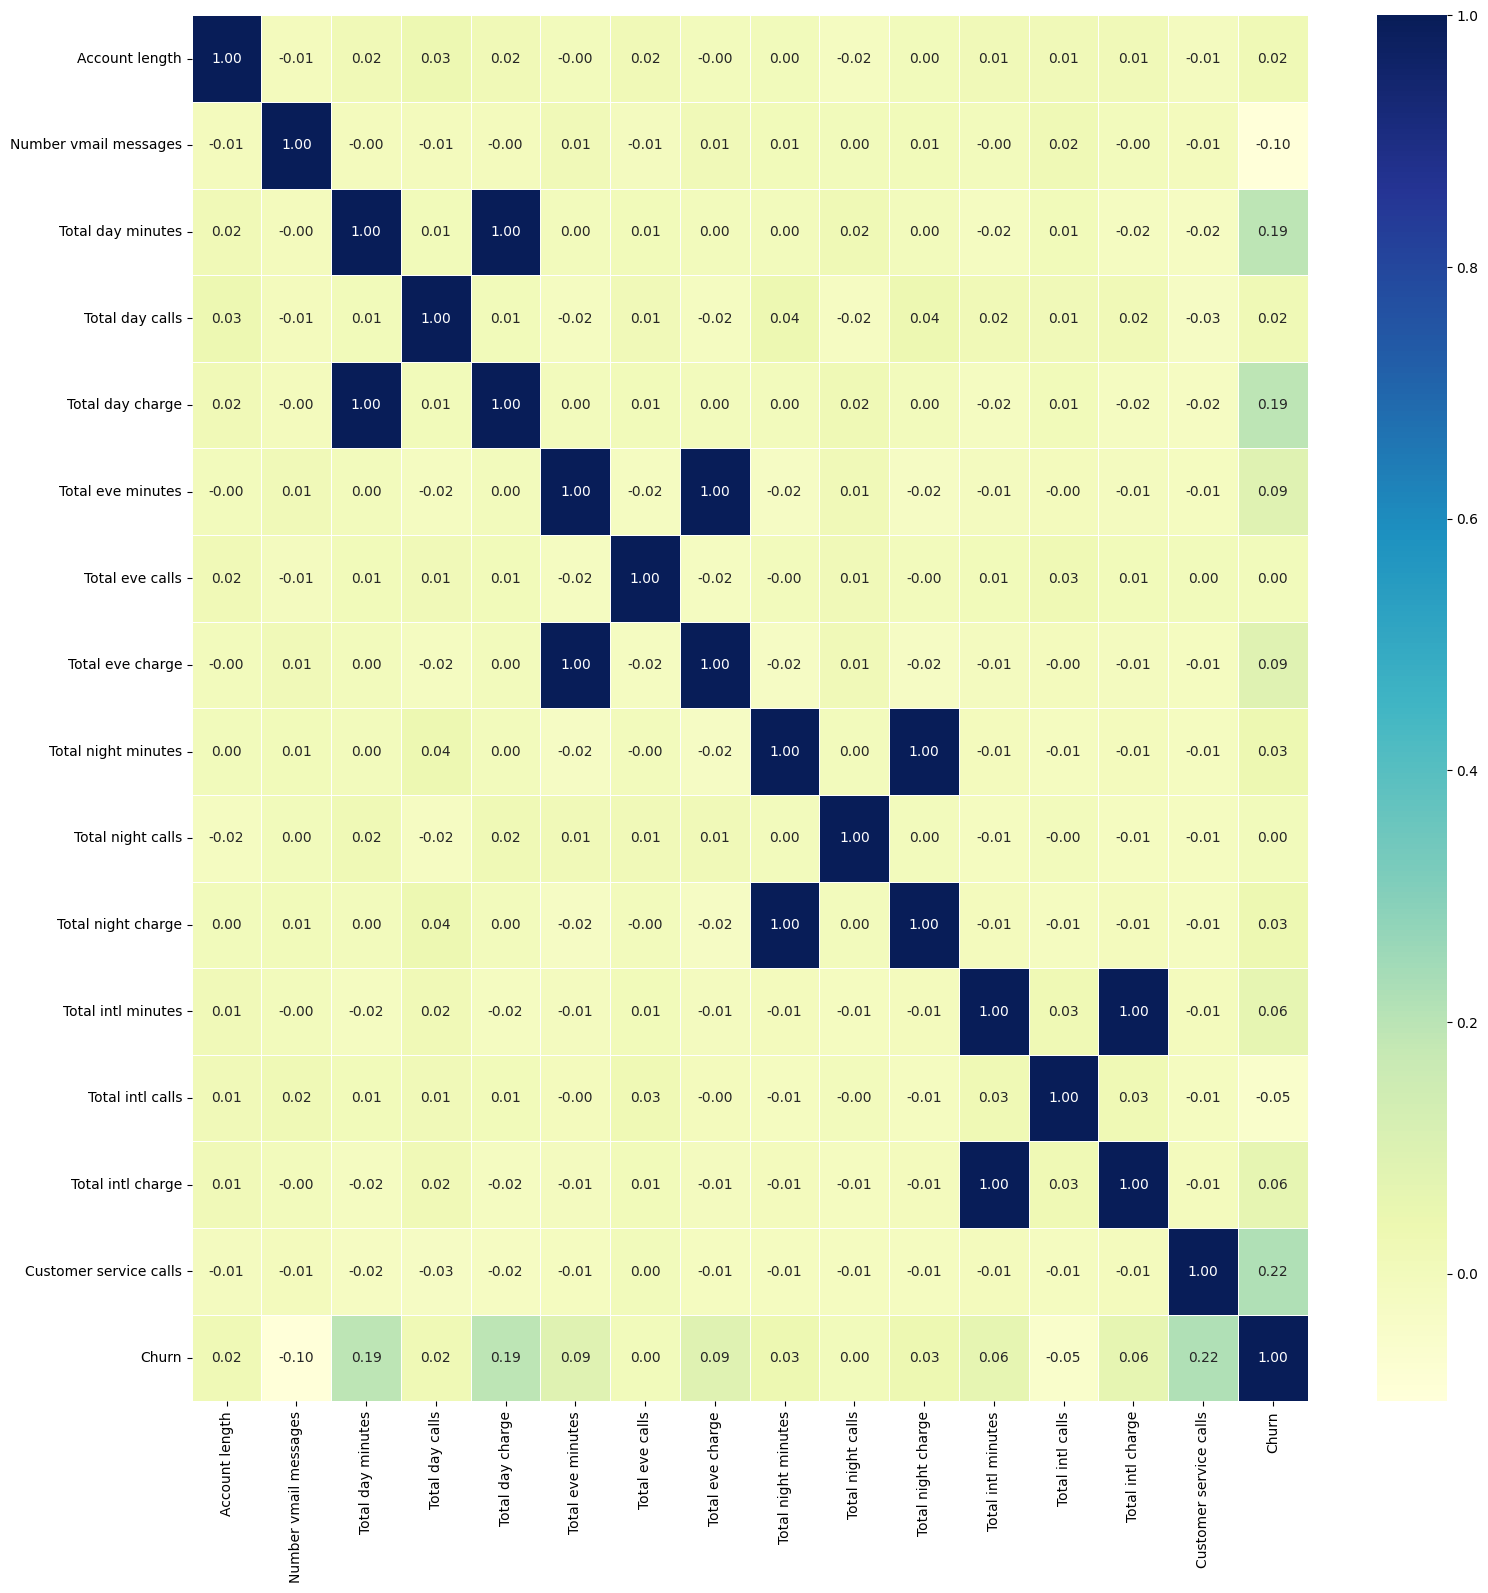

In [189]:
# plot correlations 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="YlGnBu",fmt=".2f",linewidths=0.5)

In [190]:
#drop multicollinear features
columns = ["Total intl minutes", "Total day minutes", "Total night minutes", "Total eve minutes"]
df.drop(columns, axis=1, inplace=True)

<Axes: >

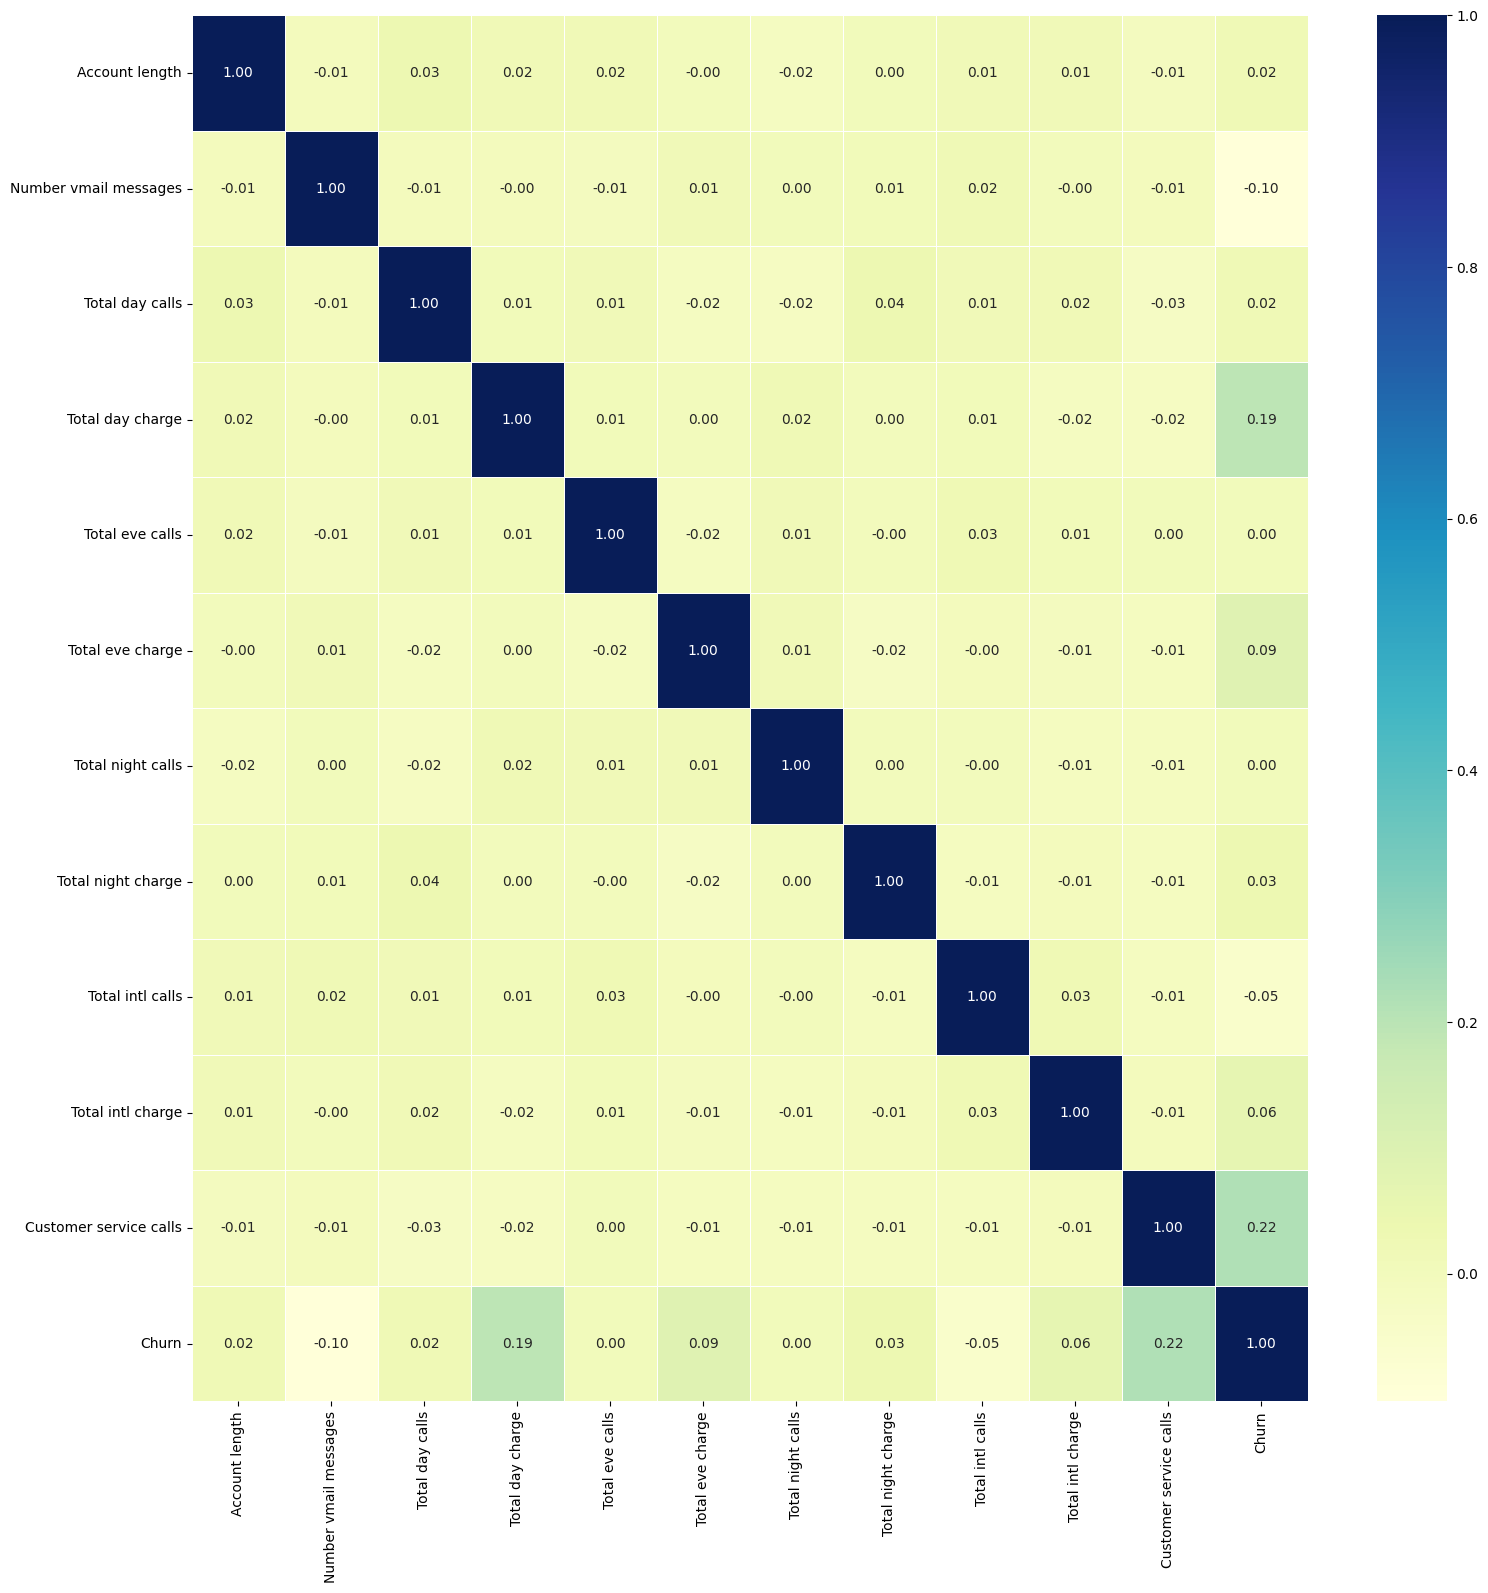

In [191]:
# plot correlations 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="YlGnBu",fmt=".2f",linewidths=0.5)

**Key Insights from the EDA**

1.) Imbalance betweend Churn Rate. Only 14.5% of the customers have churned.  
2.) The Churn rate among customers with an international Plan is much higer than among customers without an international plan.  
3.) Calls and charges have multicollinearity (correlation of 1). therefore the features that had a perfect correlation had to be removed to prevent multicollinearity.  
4.) No missing values in the data

# Q2 
The executive team needs a robust predictive solution to identify customers most at risk of
churning. Machine learning models can provide the insights required for targeted retention
strategies.


## Q2.1 Problem Type

Which kind of machine learning problem is Telecom facing? [Multiple choice,
regression, classification, recommendation systems, foundational model] 1 point

**Answer:** Telecom is facing a classification problem, because they want to predict a qualitative label (Churn: TRUE or FALSE)

## Q2.2 Models

Train two models that are adecuated to the problem. Justify why you chose those. [Free
text + code] In the code document the hyperparamenter tunning, train test split and all the
processing steps.

**Which models to choose?**  
Based on the scikit-learn algorithm cheat sheet:  
-> more than 50 samples  
-> predicting a category  
-> we have labeled data  
-> less than 100k samples  
-> No text data  

Recommended Algorithms:  
-> KNeigbors Classifier    
-> if "not working"  
-> use SVC or **Ensemble Classifiers**

I will therefore initialize Ensemble Classifiers (Random Forest and XGBoost)

### Q2.2.1 Random Forest

In [192]:
#transform Churn into 0/1
df["Churn"] = df["Churn"].astype(int)

#categorical features
categorical_features = ["State","International plan", "Voice mail plan"]

# Replace categorical features with an integer
for feature in categorical_features:
    df[feature] = pd.Categorical(df[feature]).codes 


display(df.head(10))

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,29,64,0,0,0,113,44.52,99,12.59,74,6.53,4,3.73,0,0
1,43,139,1,1,31,82,34.60,72,17.03,112,9.63,6,3.62,1,1
2,46,93,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3,0
3,10,136,0,0,0,83,27.78,119,21.19,90,11.24,4,2.65,7,0
4,14,16,1,0,0,91,18.70,75,12.52,73,8.57,7,1.73,0,0
5,15,65,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
6,36,101,0,0,0,118,15.25,79,22.11,93,7.65,11,3.65,5,1
7,42,47,0,1,30,93,33.42,140,20.52,118,10.17,4,3.48,2,0
8,29,73,0,0,0,94,33.71,101,23.74,87,6.58,8,4.00,3,0
9,33,125,0,0,0,99,28.66,107,14.93,92,10.95,7,2.94,0,0


In [193]:
#split the data
X = df.drop("Churn", axis= 1)    #features
y = df["Churn"]                  #label


In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"training set: {len(X_train)}, test set: {len(X_test)}")


training set: 2399, test set: 600


Hyperparameter tuning with grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# defining the hyperparameter values
param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'max_depth': [10, 20, 30],  # max_depth
    'max_leaf_nodes': [10, 20, 50],  # max leaf nodes
    'min_samples_split': [10, 30, 50],  # min samples per split
}

# initialize RandomForest model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5 levels of Cross Validation, optimizing for the f1 score
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# give best parameters
print("best set of hyperparameters:", grid_search.best_params_)
print("highest accuracy:", grid_search.best_score_)


c:\Users\devin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


best set of hyperparameters: {'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_split': 10, 'n_estimators': 200}
highest accuracy: 0.7114914454765191


use the best set of hyperparameters for our RandomForest model

In [196]:
best_model = grid_search.best_estimator_  # best model from grid search
test_acc = best_model.score(X_test, y_test)
train_acc = best_model.score(X_train, y_train)
print(f"train accuracy: {train_acc:.4f}")
print(f"test accuracy: {test_acc:.4f}")
print(f"gap: {train_acc-test_acc:.4f}")

train accuracy: 0.9696
test accuracy: 0.9267
gap: 0.0429


manually increasing the min_samples_split to 50 and use balanced class weight, to reduce the overfitting

In [197]:
from sklearn.ensemble import RandomForestClassifier

# initialize the model
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, max_leaf_nodes= 50, class_weight='balanced', min_samples_split=50, random_state=42)

# train the model
rfc.fit(X_train, y_train)

train_acc = rfc.score(X_train, y_train)
test_acc = rfc.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

print(f"gap: {train_acc-test_acc:.4f}")

# Make predictions with Random Forest
y_pred_rfc = rfc.predict(X_test)

# Print classification report for the Random Forest model
print(classification_report(y_test, y_pred_rfc))

Train Accuracy: 0.9308
Test Accuracy: 0.9017
gap: 0.0291
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       512
           1       0.63      0.82      0.71        88

    accuracy                           0.90       600
   macro avg       0.80      0.87      0.83       600
weighted avg       0.92      0.90      0.91       600



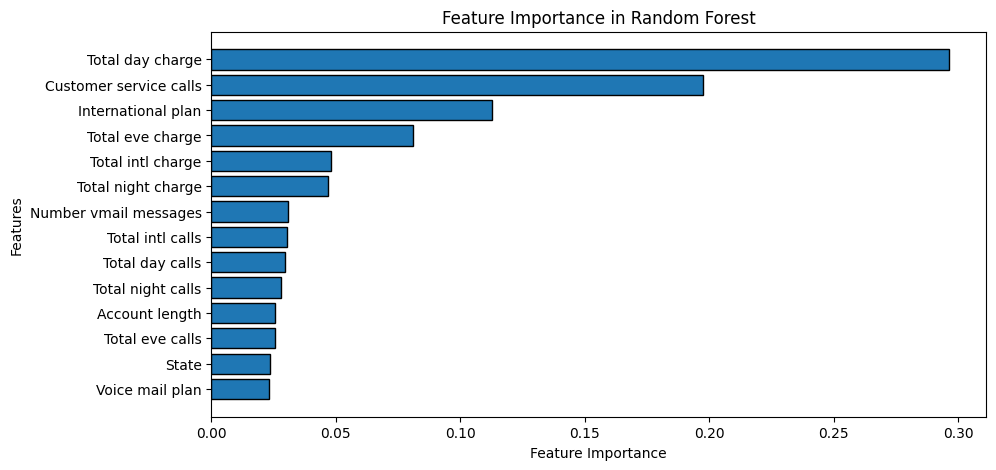

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = rfc.feature_importances_

features = X_train.columns

# create df
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], edgecolor='black')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  
plt.show()


### Q2.2.2 XGBoosting

In [199]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the base XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 7],  # Tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 1.0],  # Fraction of data for each boosting round
    'colsample_bytree': [0.7, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.2]  # Minimum loss reduction for a split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="f1", 
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(" Best Hyperparameters:", grid_search.best_params_)
print(" Best Model Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\devin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


 Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
 Best Model Accuracy: 0.8151891550756659


In [200]:
from sklearn.metrics import accuracy_score, classification_report


# Train the final model with optimal parameters
# lower max_depth and increase min_child_weight to lower overfitting
final_xgb_model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=2,
    n_estimators=100,
    subsample=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

final_xgb_model.fit(X_train, y_train)

# Make final predictions
y_pred_final = final_xgb_model.predict(X_test)

# Evaluate final model
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Final Model Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       512
           1       0.93      0.72      0.81        88

    accuracy                           0.95       600
   macro avg       0.94      0.85      0.89       600
weighted avg       0.95      0.95      0.95       600



In [201]:
train_accuracy = accuracy_score(y_train, final_xgb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, final_xgb_model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9808
Test Accuracy: 0.9500


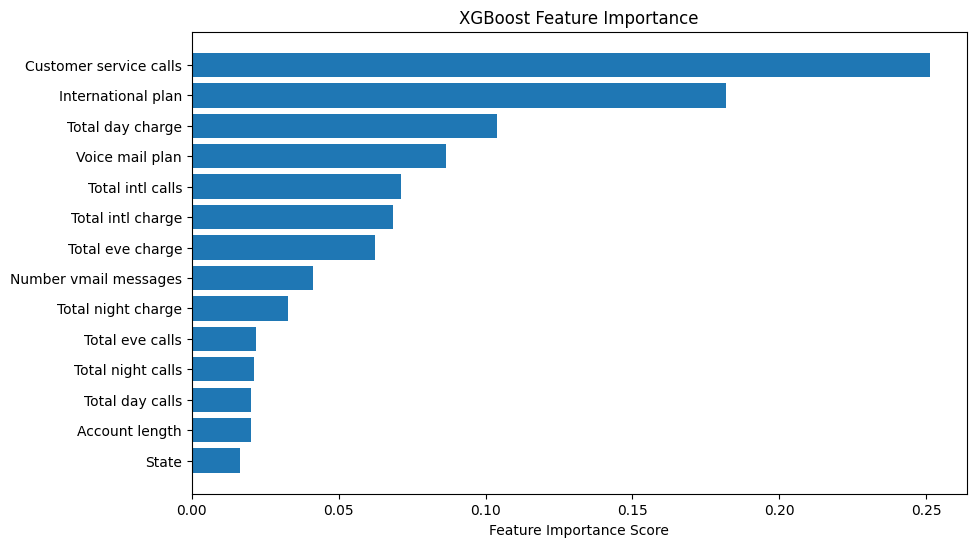

In [202]:
import numpy as np
# Get feature importance scores
feature_importance = final_xgb_model.feature_importances_
feature_names = X_train.columns

# Sort by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("XGBoost Feature Importance")
plt.show()


# Q3

To ensure the predictive models are reliable, the taskforce must evaluate their performance
using appropriate metrics. This evaluation will determine which model is best suited for
deployment.

## Q3.1 Evaluation Metric

Which performance metric should we use to evaluate the performance? Why? 


The choice of a performance metric is crucial for evaluating the reliability of predictive models, especially in a binary classification problem like churn prediction. Given that the churn rate in the dataset is imbalanced (only 14.5% of customers have churned), the selected metric must ensure that the model performs well in detecting churners without being biased toward the majority class.

Chosen Metric: **F1-Score**   
I selected the F1-score as the primary evaluation metric for the following reasons:  

1. **Accuracy is Misleading Due to Class Imbalance**  
Since only 14.5% of customers churn, a model that predicts all customers as non-churners would still achieve 85.5% accuracy, despite failing to identify any actual churners.  
This highlights why accuracy alone is not a reliable metric in an imbalanced dataset.
2. **F1-Score Balances Precision and Recall**  
The F1-score is the harmonic mean of precision and recall, making it a better metric than accuracy when the dataset is imbalanced.  
Precision ensures that when the model predicts churn, it is correct most of the time (avoiding too many false positives).  
Recall ensures that the model correctly identifies most of the actual churners (reducing false negatives).  
The F1-score provides a balanced trade-off, making it an ideal metric when both false positives and false negatives are important.  
3. **Business Relevance of False Positives & False Negatives**  
False Negatives (missed churners): If the model fails to identify a customer who is actually going to churn, the company loses an opportunity to take proactive retention measures.
False Positives (wrongly flagged churners): If the model incorrectly predicts a non-churning customer as a churner, the company may waste resources offering unnecessary incentives.
Optimizing the F1-score ensures that the model minimizes both of these costly errors, making it the best choice for deployment.

## Q3.2 Evaluation Metric

Which model provided the best results?

XGBoost achieves higher overall accuracy (95%) compared to Random Forest (90.17%). This suggests that XGBoost is better at generalizing to unseen data. Additionally, XGBoost provides a higher F1-score for the minority class (0.81 vs. 0.71), indicating that it is more effective at correctly identifying churners while maintaining a good balance between precision and recall. The recall for churners (0.72 in XGBoost vs. 0.82 in Random Forest) shows that Random Forest captures more actual churners, but at the cost of lower precision (0.63 vs. 0.93), meaning it produces more false positives.

Another important consideration is the train-test gap, which is slightly higher in XGBoost (3%) than in Random Forest (2.91%). This indicates that XGBoost slightly overfits more than Random Forest. However, since the test performance remains superior, this does not pose a significant issue.

Overall, XGBoost is the better model for deployment as it delivers higher accuracy and better minority class performance, which is crucial given the imbalanced dataset. Random Forest may be preferable in cases where recall is the primary concern, but XGBoost offers a more balanced and robust performance.

**Important Note: We were asked to optimize for Accuracy, even though its not the optimal evaluation metric here**


# Q4

In [203]:
import pandas as pd
import pickle
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define student number for file naming
student_number = "65722"

# Identify categorical & numerical columns
categorical_features = ['International plan', 'Voice mail plan', 'State']
numerical_features = [
    "Account length", "Number vmail messages",
    "Total day calls", "Total day charge",
    "Total eve calls", "Total eve charge",
    "Total night calls", "Total night charge",
    "Total intl calls", "Total intl charge",
    "Customer service calls"
]

# Define the preprocessing pipeline
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace NaN with median
    ('scaler', StandardScaler())  # Apply Z-normalization
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical to numeric
])

# Combine feature engineering, numerical processing, and categorical encoding in one pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]))
])

# Load data (assuming df is already loaded)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Apply preprocessing transformations
X_transformed = preprocessing_pipeline.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=7)

# Train **XGBoost** Model
xgb_model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=2,
    n_estimators=100,
    subsample=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, Y_train)

# Save **Preprocessing + Feature Engineering Together**
preprocessor_filename = f"{student_number}_Preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessing_pipeline, file)

# Save **XGBoost Model** as Pickle
model_filename = f"{student_number}_Model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(xgb_model, file)  # Saving XGBClassifier using Pickle

print(f"Files saved successfully:\n - {preprocessor_filename}\n - {model_filename}")


Files saved successfully:
 - 65722_Preprocessor.pkl
 - 65722_Model.pkl


In [204]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [205]:
import pickle
import pandas as pd

# Load the preprocessing pipeline (including feature engineering)
with open("65722_Preprocessor.pkl", "rb") as file:
    loaded_preprocessor = pickle.load(file)

# Load the XGBoost model (pickled)
with open("65722_Model.pkl", "rb") as file:
    xgb_loaded_model = pickle.load(file)

print("Preprocessing pipeline (feature engineering + transformations) and XGBoost model loaded successfully!")


# Laden der CSV-Datei
new_data = pd.read_excel("2767ML_validation_data.xls")

display(new_data.head())  # Erste Zeilen ausgeben, um zu überprüfen, ob alles korrekt geladen wurde


# Apply feature engineering and preprocessing together
new_data_transformed = loaded_preprocessor.transform(new_data)

# Make prediction using the loaded XGBoost model
xgb_prediction = xgb_loaded_model.predict(new_data_transformed)

print(f"XGBoost Prediction: {xgb_prediction}")


Preprocessing pipeline (feature engineering + transformations) and XGBoost model loaded successfully!


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,CT,90,415,No,No,0,37.8,80,6.43,155.3,105,13.20,175.0,111,7.88,14.2,5,3.83,3
1,MO,164,408,No,Yes,25,219.1,88,37.25,151.5,99,12.88,50.1,60,2.25,14.3,6,3.86,1
2,AK,52,415,No,Yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


XGBoost Prediction: [1 1 0]


# Q5 
The executive team requires actionable insights to guide the strategy to address customer churn
effectively. This analysis will directly inform their decisions  
  
## Q5.1 Feature Importance  
What customer characteristics most strongly influence churn?   



Both models have a different order, but the feature importance graphics both show that the 3 most important features leading to churn are: Customer Service calls, International Plan and Total day charge

## Q5.2 Actionable steps  
What actionable steps should the company take to reduce churn? Suggest two strategies.

The feature importance suggest that:  

a) Regarding customer service calls: TelCom needs to find out the reasons for customer service calls. Why are customers calling the service? Those customers are more likely to churn. Analyse rrors and find solutions for problems that the customers are calling for, to reduce churning. On the other hand, Telcom should improve customer service experience during those calls. In this way customers might feel well treated and helped, preventing them from churning.  

b) Consider pricing strategies, as a high total day charge leads to churning. Think about discounts for frequent users to prevent them from churning.